# Step Functions

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import hotstepper as hs
from hotstepper import Step, Steps


## What is a step function?

In simple terms, atleast mathematically, it is a piecewise continous function that maps a set to a constant value via a boolean predicate indicating membership of the set, and maps to zero when a member of the compliment set.

Formally, we can define a step function as the union of piecewise constant intervals, essentially a linear expansion of constant intervals by way of a basis function defined by a boolean predicate.

An indicator function can be defined as:

$\begin{equation*}
\chi_A(x) = \left\{
        \begin{array}{ll}
            0 & \quad x \notin A \\
            1 & \quad x \in A
        \end{array}
\right\}
\;\;\;\;\; where \;A \in \mathbb{R}
\end{equation*}$

We can also use a shorthand notation for the indicator function by using the [Iversion bracket notation](https://en.wikipedia.org/wiki/Iverson_bracket), this allows for a definition of a boolean predicate that is syntactically similar to the way we select intervals of a Numpy array.

$\chi_A(x) = {[x \in A]}$

With these definitions, we can define a step function as an expansion of constant values $\alpha_n \in \mathbb{R}$ over a basis of indicator functions.

$f(x) = \displaystyle\sum_{n=0}^{N}{\alpha_n \chi_n(x)}$
where $\chi_n(x) = {[x \in A_n]}$

The practical advantages of using step functions and specifically this definition comes from looking at what this equation looks similar to. It looks like a vector function defined over a set of basis functions. If we have a set of orthagonal basis functions that are complete (in the proper sense), than any linear combination of the basis functions can represent any function within the space span by those basis.

Think Euclidean geometry and the x,y and z basis, we can express any point in this 3D space as a linear combination of those three basis functions, they just happen to be constant and magnitude 1 and each span the entire real line.

We have the same here, the indicator functions play the role of the basis, however if we test for orthagonality of different basis fucntions (indicator functions), we find something interesting.

$\chi_1(x) = {[x \in S_1]}$ <br>
$\chi_2(x) = {[x \in S_2]}$ <br>

$\chi_1(x) \cdot \chi_2(x) = {[x \in S_1]} \cdot {[x \in S_2]} = [x \in (S_1 \cap S_2)]$ <br>

Now, if the sets $S_1$ and $S_2$ overlap, the result is a new interval defined by $S_3 = S_1 \cap S_2$ and $\chi_3(x) = [x \in S_3]$. This behaviour is the same as that of a mathematical group, were we apply the group operation, in this case, an intersection (the dot product) and the result is another element of the group, in this case another interval.

When the two sets don't have any overlap, $S_1 \cap S_2 = \emptyset$, this result is the same as an [orthogonal basis](https://en.wikipedia.org/wiki/Orthogonal_basis).

Based on these results, we can draw some important results.

1. $\chi_1(x) \cdot \chi_2(x) \cdot \chi_3(x) = [x \in S_1 \cap S_2 \cap S_3]=[x \in S_3 \cap S_2 \cap S_1] = \chi_3(x) \cdot \chi_2(x) \cdot \chi_1(x)$
2. $\chi_1(x) + \chi_2(x) + \chi_3(x) = [x \in S_1 \cup S_2 \cup S_3]= [x \in S_3 \cup S_2 \cup S_1] = \chi_3(x) + \chi_2(x) + \chi_1(x)$
2. $\chi_1(x) \cdot (\chi_2(x) + \chi_3(x)) = [x \in S_1 \cap (S_2 \cup S_3)] = [x \in (S_1 \cap S_2) \cup (S_1 \cap S_3)] = \chi_1 \cdot \chi_2 + \chi_1 \cdot \chi_3 = \chi_2 \cdot \chi_1 + \chi_3 \cdot \chi_1$
<br><br>

$where \;\; S_1,S_2,S_3 \in \mathbb{R}$

These results show that using basis functions defined over set membership via indicator functions equipped with addition and multiplication operations leads to a [communatative ring](https://en.wikipedia.org/wiki/Commutative_ring). We can skip to the end of the story by observing that we have defined a [sigma algebra](https://en.wikipedia.org/wiki/%CE%A3-algebra) over partitions of the real line. Since the definitions of the partitions is based on the step data we are considering, the exact set of partitions will vary from data to data, therefore each step function defines a different, but not unique set of partitions over the real line. These partitions can be considered a none unique set of basis functions, since we could show above that when $S_1 \cap S_2 = \emptyset$ the sets $S_1$ and $S_2$ are orthagonal in the sense defined over a vector space. With this interpretation, our indicator functions can be promoted to basis functions with a few conditions.

We won't exhaust the point and this isn't a mathematical paper, so I won't push forward any further for now, unless I get some interest in expanding these concepts further. The final result we will need before moving onto the basis interpretation within the HotStepper library is, if we have a set of indicator functions that span our data in order to represent a step function, we can define a tuple of scalars over the basis functions that represent the weighting the function has across each indicator (basis) function. Since we have alot of freedom to choose indicator functions, as long as they don't overlap (their intersection is the empty set) and to ensure we have a function defined across the entire real line, we will also need to include, for completeness, any partitions that are not covered by the indicator functions.

That is a really long winded way of say that we have to have enough indicator fucntions to represent, without overlap, the entire real line, otherwise we would have gaps and therefore we would run into issues if we reparametertised our basis functions, hint hint, using a one parameter family of indicator functions that represent a limit based definition of our indicator functions, specifically our chosen favourite son, the Heaviside step function.



## Step Function Basis

The idea of this libary is to take advantage of the power of linear algebra when dealing with count value data. There are a number of approaches to analysing and modelling count data, however these tend to fall in two broad categories. The first approach relies on known discrete statistical distributions such as the Poisson, Binomial and Negative Binomial. There are many powerful models that can be formulated and provide great utility via this approach, particularly when combined with Markov Chain and Bayesian techniques. The second aproach relies on approximating the discrete data as being continious and using the factory of techniques such as linear regression and linear (not nessarily linear) models. This approach is very common when the count values are relatively high and clamping the output values as integers provides good results.

The challenge is when we have low count data and don't wish to use a purely statistical approach. This library provides an alternative in this areana and has the flexbility to be applicable within both high and low count regimes. The second advantage this library presents is the use of traditional linear algebra techniques, as this allows for the use of many powerful results which would only be indirectly accessible when using the continous approximation or statistical approaches.

For those that need some specifics and don't want to just take my word for it, let's open this jar of pickles and see where it goes.
The first step (pun intended) is to look to provide a solid foundation for any count type data we may encounter, by this I mean specifically, we don't want to treat the data in a vaccuum and on a case by case basis. That segways neatly to the solution, we represent the data in a basis, just as we use catesian coordinates to represent a position in space by way of three numbers, we can select a basis in which any of our count data can be represented.

Since the count data naturally appears to be a series of step functions, often referred to as a staircase function, we can select the most straight forward and well known step function as a basis, namely the Heaviside step function. Note that the definition we are using here adopts the convention of including the zero point in right hand domain and reprsents the first location of the shift from the null mapped set to the unity mapped set.

Therefore we use the definition of the [Heaviside function](https://en.wikipedia.org/wiki/Heaviside_step_function) here as:

$\begin{equation*}
    \theta(t) = \left\{
            \begin{array}{ll}
                0 & \quad t < 0 \\
                1 & \quad t \geq 0
            \end{array}
    \right\}
    \;\;\;\;\; where \;t \in \mathbb{R}
\end{equation*}$

This definition seems unrelated to our discussion on sets and indicator functions, however, if we use the Iverson bracket notation to rewrite the Heaviside function, it becomes clear that the Heaviside function can be seen to represent an indicator function. 

$\theta(t) = [t \in [0,\infty)] \;\;\; where \; t \in \mathbb{R}$

Using the Heaviside function defined above, we can use it as a basis to represent any step data by expanding individual steps by shifting and multiplying the Heaviside function. More formally, if we have a single step at 0 with unit weight, we can represent this as;

$f(t) = \theta(t)=[t \in [0, \infty)] \;\;\; where \; t \in \mathbb{R}$

We can plot this directly using a Step object from HotStepper. We have explicitly set the start and weight for clarity.


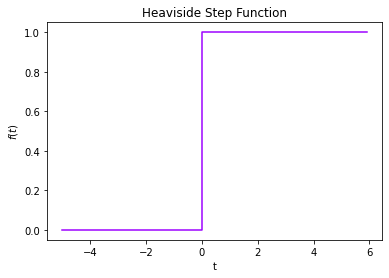

In [2]:
t = np.arange(-5,6,0.1)
fig,ax = plt.subplots()

heaviside = Step(start=0,weight=1)

ax.step(t,heaviside(t))
    
ax.set_xlabel('t')
ax.set_ylabel('$f(t)$')
ax.set_title('Heaviside Step Function');

That seems rather unexciting, however, if we have another step function that steps at 3 instead of 0, we can subtract this second step from the first and get something slightly more interesting.

Mathematically, we can represent these two individual steps via the Heaviside function as;

$f(t)_1 = \theta(t) = [t \in [0, \infty)]$

$f(t)_2 = \theta(t-3)=[t \in [3, \infty)]$

And subtracting the second from the first, we have;

$f(t) = f(t)_1 - f(t)_2 = \theta(t) - \theta(t-3)$

We can once again plot the result to see what we get, this time we didn't set the weight value, as HotStepper assigns a value of 1 when no value is provided.

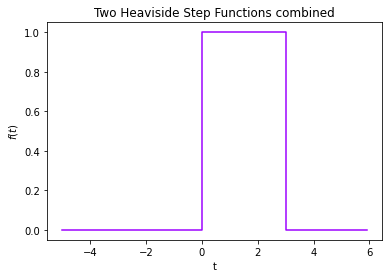

In [3]:
t = np.arange(-5,6,0.1)
fig,ax = plt.subplots()

step1 = Step(start=0)
step2 = Step(start=3)
steps = step1 - step2

ax.step(t,steps(t))
    
ax.set_xlabel('t')
ax.set_ylabel('$f(t)$')
ax.set_title('Two Heaviside Step Functions combined');

Before we move on, we can also scale or weight the step. Recalling the definition of a step function expressed in a basis of indicator functions.

$f(x) = \displaystyle\sum_{n=0}^{N}{\alpha_n \chi_n(x)}$
where $\chi_n(x) = {[x \in A_n]}$

We can assign a value to the $\alpha_n$ that will scale the step value, in the current example, we can change the weight of each step and when combined, see the result as before.

For example, let;

$\alpha_1 = 2$

$\alpha_2 = 3$

$f(t)_1 = \alpha_1\theta(t) = 2 \cdot [t \in [0, \infty)]$

$f(t)_2 = \alpha_2\theta(t-3)=3 \cdot [t \in [3, \infty)]$

And subtracting the second from the first, we have;

$f(t) = f(t)_1 - f(t)_2 = 2\theta(t) - 3\theta(t-3)$

The result is plotted below.

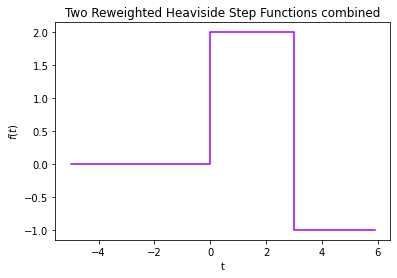

In [4]:
t = np.arange(-5,6,0.1)
fig,ax = plt.subplots()

step1 = Step(start=0, weight=2)
step2 = Step(start=3,weight=3)
steps = step1 - step2

ax.step(t,steps(t))
    
ax.set_xlabel('t')
ax.set_ylabel('$f(t)$')
ax.set_title('Two Reweighted Heaviside Step Functions combined');

Ok, while you haven't fallen asleep already, we can add and subtract a bunch of these shifted and reweighted instances of the Heaviside function and get all sorts of crazy stairs and step looking reults.



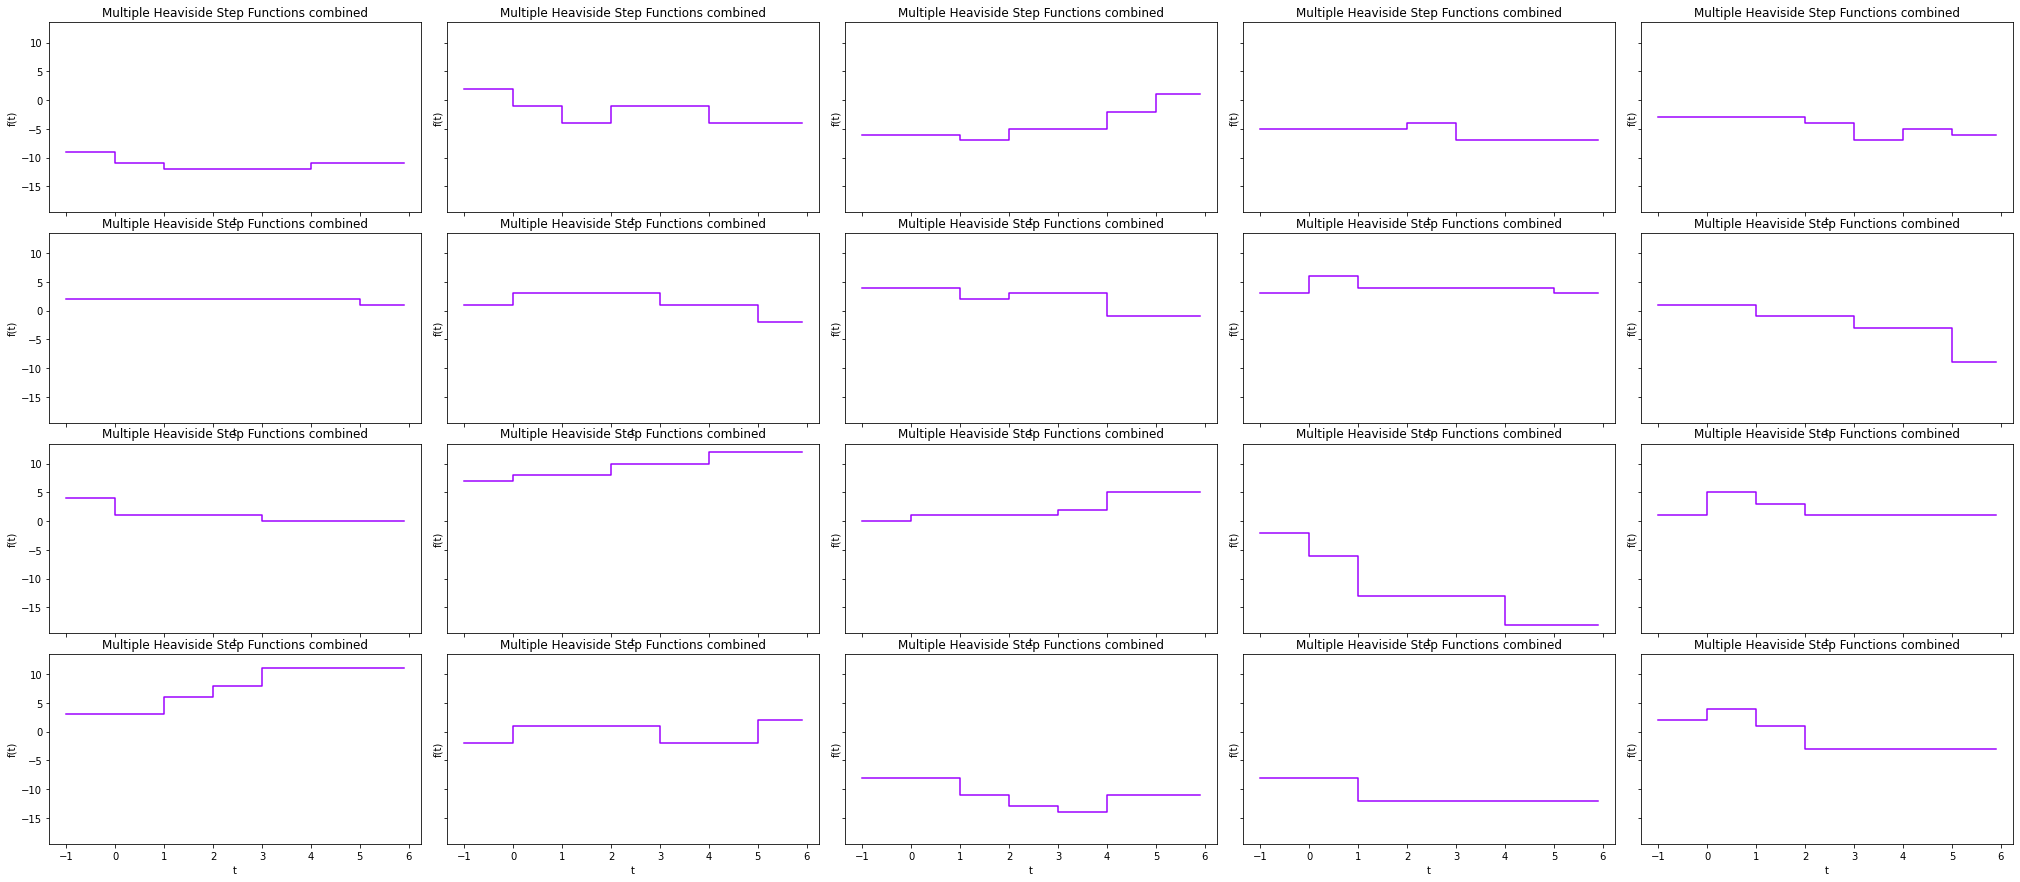

In [5]:
def generate_step_func(samples, x_vals):
    steps = np.zeros(len(x_vals))

    for i in range(samples):
        signs = random.choice([-3,-2,-1,1,2,3])
        shifts = random.randint(-5,5)
        steps += signs*Step(start=shifts)(x_vals)
        
    return steps
    

t = np.arange(-1,6,0.1)
fig,axs = plt.subplots(nrows=4, ncols=5,figsize=(28,12),sharey=True, sharex=True)


plt.tight_layout()

for i,ax in np.ndenumerate(axs):
    steps_data = generate_step_func(10, t)
    ax.step(t,steps_data)
    ax.set_xlabel('t')
    ax.set_title('Multiple Heaviside Step Functions combined')
    ax.set_ylabel('f(t)')



## The Heaviside Basis

From the sample charts generated above, it can be observed that the ability to produce a step function of any level of complexity by forming linear combinations of Heaviside functions is fairly simple and easy to understand. By using the Heaviside function as a basis, any combination of up and down steps, which occur at any time can be defined mathematically. By putting the data into this format, we can perform analysis, modifications and modelling with ease by using the rules of linear algebra.

Now for the question that means the most, why would we want to be able to use linear algebra techniques for our data? 

Let's look once again at the step function representation using the Heaviside function basis.

$f(x) = \displaystyle\sum_{n=0}^{N}{\alpha_n \theta(t-k_n)}$

$where \;\;\; t, \alpha_n, k_n \in \mathbb{R}$

Where we scale the basis with the values of $\alpha_n$ and shift the basis with the values $k_n$. The shifting property is why we discussed the set nature of the indicator functions and their relation to the Heaviside function. By shifting the basis, we are effectively defining a new set, the indicator function maps the independant variable $t$ membership of the set defined by $S = [k_n, \infty)$ to either 0 or 1. From this, we can see that the $\alpha_n$ values represent the scalar tuple that are the weighting of each basis component for the vector space span by our step function.

Just a reminder of an analogy, the real 3D vector space of positions.

We can represent a point in that space as a weighting of the basis vectors x, y and z, where a more convenient representation of the basis vectors is $\displaystyle\sum_{i=1}^{3}{x_i}$

Therefore a point in this space is;

$p(a,b,c) = \displaystyle\sum_{i=1}^{3}{x_i} \cdot (a,b,c)^T = a x_1 + b x_2 + c x_3$

So for our step function, we have the Heaviside function playing the role of the x's and the $\alpha$'s playing the role of the weights. For now we'll leave it there, as we now have enough background to explore the next fun part of HotStepper, when we create our step function and then change the basis functions to something else, without spoiling the surprise, we get something alot smoother and having the flexibility to rebase our data for a large number of reasons and ofcourse for fun!